<a href="https://colab.research.google.com/github/Duku-code/Duku/blob/main/Driver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [36]:
data = pd.read_csv('driver-data.csv')
data.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [37]:
data.shape

(4000, 3)

In [38]:
data.duplicated().sum()

0

In [39]:
data_new = data.drop(columns=['id'])
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_new), columns=data_new.columns)
data_scaled.head()

,mean_dist_day,mean_over_speed_perc
0,-0.089810,1.260613
1,-0.439773,1.041744
2,-0.215131,1.187656
3,-0.380666,0.822875
4,-0.401428,1.041744


In [40]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [42]:
import warnings
warnings.filterwarnings('ignore')

8000.000000000002
3911.9263904284194
1756.544582131428
739.1534508645589
619.4037594868004
503.2594888622692
438.8001906577008
374.56617459346216
337.3814051960672


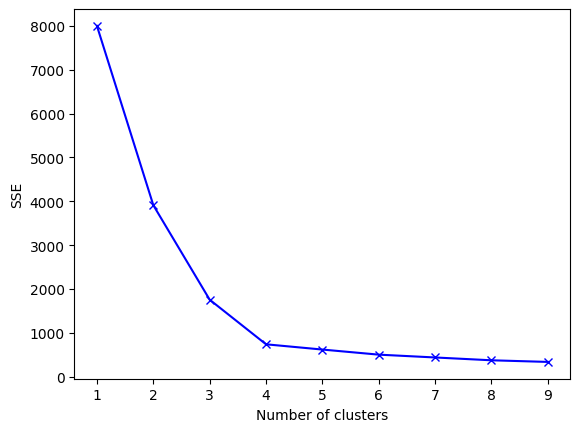

In [43]:
sse = {}

for k in range(1,10):
  kmeans = KMeans(n_clusters=k, random_state=1)
  kmeans.fit(data_scaled)
  sse[k] = kmeans.inertia_
  print(kmeans.inertia_)

plt.plot(list(sse.keys()), list(sse.values()),'bx-')
plt.xlabel('Number of clusters')
plt.ylabel("SSE")
plt.show()

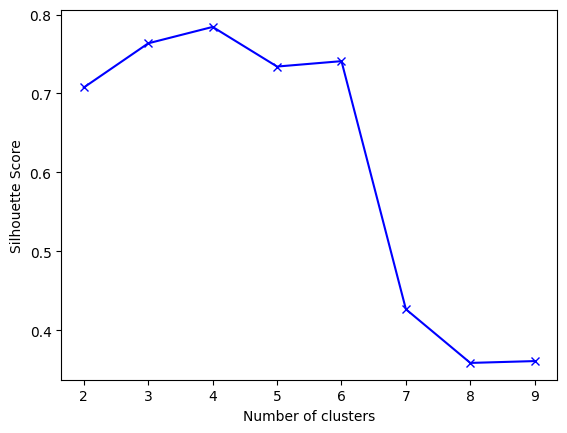

In [44]:
sc = {}

for k in range(2,10):
  kmeans = KMeans(n_clusters=k, random_state=1)
  kmeans.fit(data_scaled)
  labels = kmeans.predict(data_scaled)
  sc[k] = silhouette_score(data_scaled,labels)
  

plt.plot(list(sc.keys()), list(sc.values()),'bx-')
plt.xlabel('Number of clusters')
plt.ylabel("Silhouette Score")
plt.show()

In [45]:
kmeans = KMeans(n_clusters=4,random_state=1)
kmeans.fit(data_scaled)
data['cluster_label'] = kmeans.predict(data_scaled)

In [46]:
data.head()

,id,mean_dist_day,mean_over_speed_perc,cluster_label
0,3423311935,71.24,28,2
1,3423313212,52.53,25,2
2,3423313724,64.54,27,2
3,3423311373,55.69,22,2
4,3423310999,54.58,25,2


In [48]:
data.groupby('cluster_label').agg(['mean', 'median'])

id               mean_dist_day          \
                       mean        median          mean  median   
cluster_label                                                     
0              3.423312e+09  3.423312e+09     50.016637   50.18   
1              3.423312e+09  3.423312e+09    180.434863  179.61   
2              3.423312e+09  3.423312e+09     50.404824   50.93   
3              3.423313e+09  3.423313e+09    177.835096  177.74   

              mean_over_speed_perc         
                              mean median  
cluster_label                              
0                         5.204037    5.0  
1                        10.529496   10.0  
2                        32.365340   32.0  
3                        70.288462   70.0